## BOSTON HOUSING CLUSTERING PROJECT

### Objective
#### This project's objective is to assist individuals who are interested in buying or renting a home in Boston and those who want to make investment decisions in the housing market. To achieve this objective, we analyze the market dynamics in different towns and identify critical factors such as the number of rooms per dwelling, age of buildings, median home value, crime rate in the neighborhood, and accessibility to radial highways.

In [ ]:
# Import all the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import machine learning and clustering algorithms
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
# to compute distances
from scipy.spatial.distance import pdist

# Import utilities for computing distances
from scipy.spatial.distance import cdist

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_1 = pd.read_csv("boston.csv")

In [ ]:
df = df_1.copy()
df.shape

(506, 13)

#### Boston dataset contains 506 rows and 13 columns

In [ ]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


#### Looking at the first 5 rows of our dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


#### Boston dataset contains 13 variables. All of them are numerical.
#### Variables names

•	CRIM: per capita crime rate by town

•	ZN: proportion of residential land zoned for lots over 25,000 sq. ft.

•	INDUS: proportion of non-retail business acres per town

•	CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

•	NOX: nitric oxides concentration (parts per 10 million)

•	RM: average number of rooms per dwelling

•	AGE: proportion of owner-occupied units built prior to 1940

•	DIS: weighted distances to five Boston employment centers

•	RAD: index of accessibility to radial highways

•	TAX: full-value property-tax rate per 10,000 dollars

•	PTRATIO: pupil-teacher ratio by town

•	LSTAT: %lower status of the population

•	MEDV: Median value of owner-occupied homes in 1000 dollars.


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [ ]:
# dropping/ignoring object variable columns
df = df.drop(columns=["CHAS"])

#### Dropping the variable CHAS ( Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) because it doesn't add any value to the clusterong process.

In [ ]:
# checking for missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

#### There are no missing values in the Boston Houses dataset.

In [ ]:
df.duplicated().sum()

0

#### There are no duplicates in our dateset.

# EDA

CRIM
Skew : 5.22


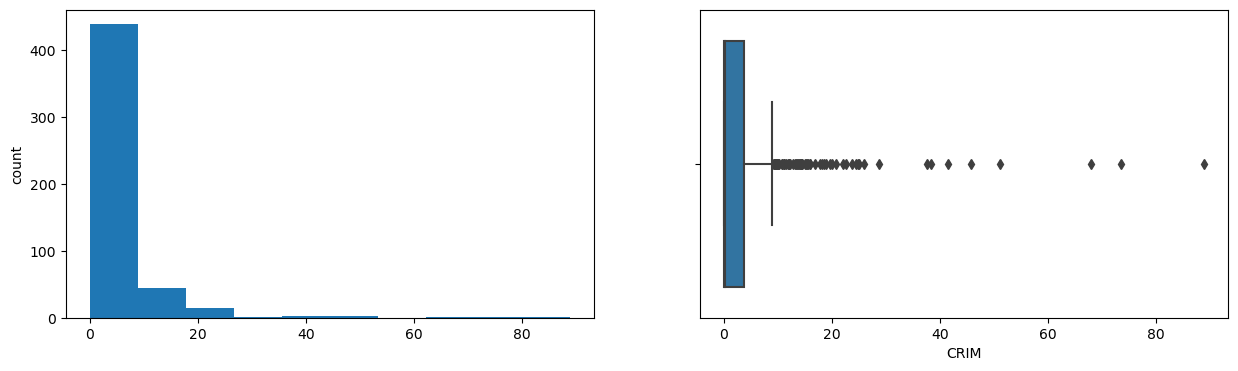

ZN
Skew : 2.23


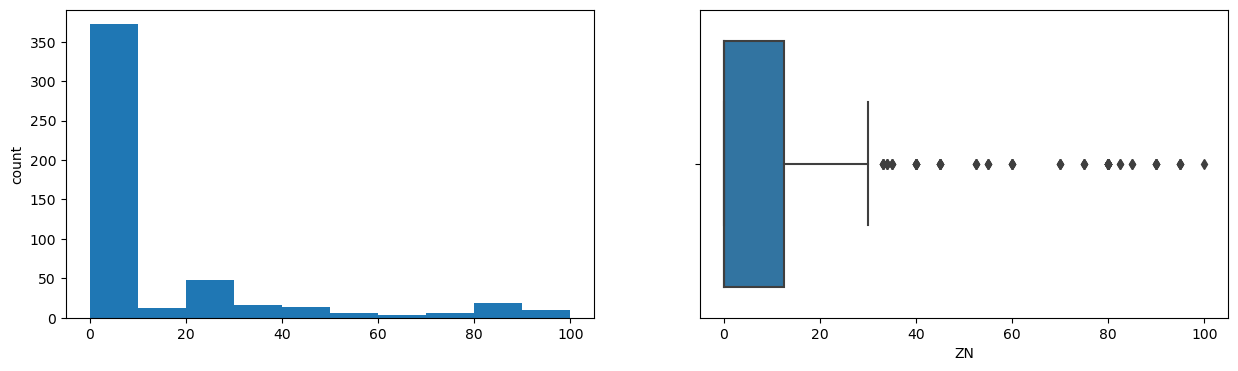

INDUS
Skew : 0.3


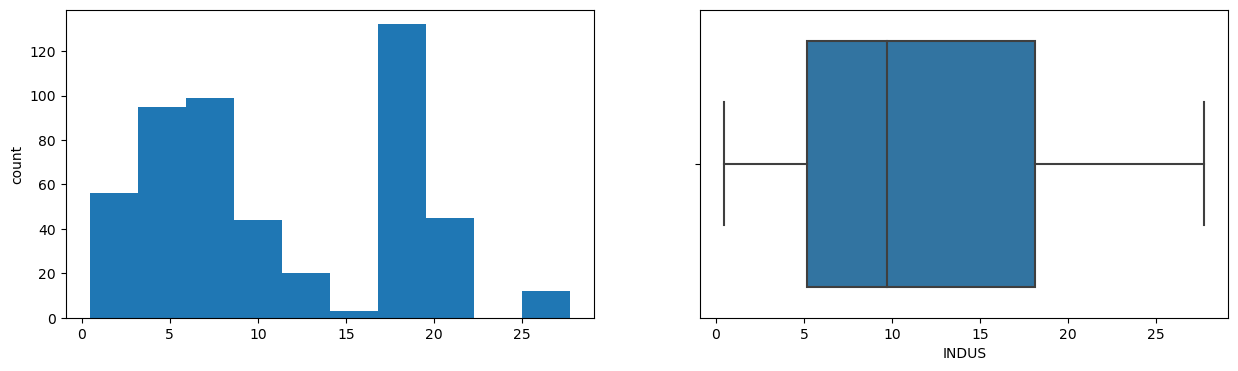

NX
Skew : 0.73


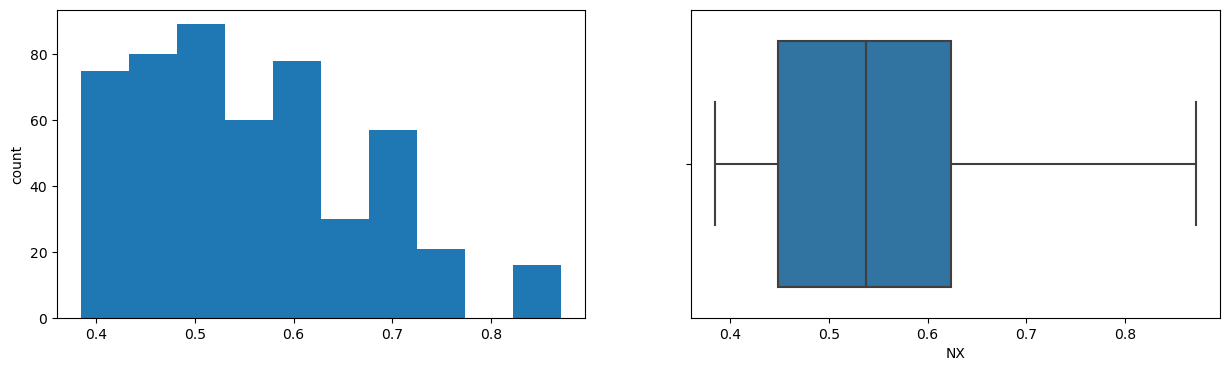

RM
Skew : 0.4


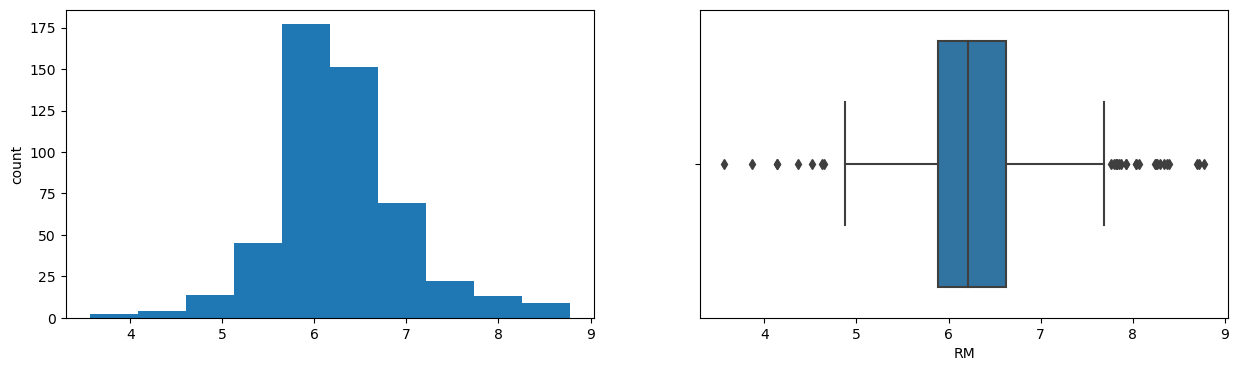

AGE
Skew : -0.6


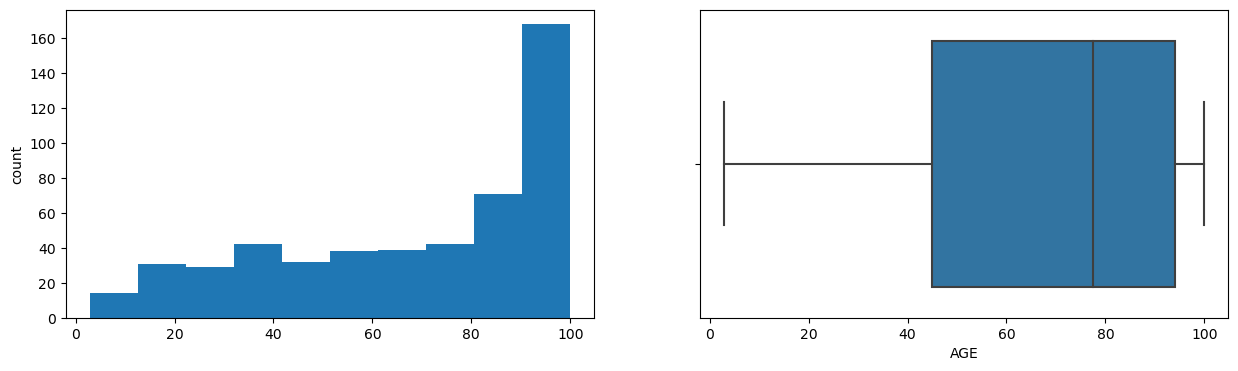

DIS
Skew : 1.01


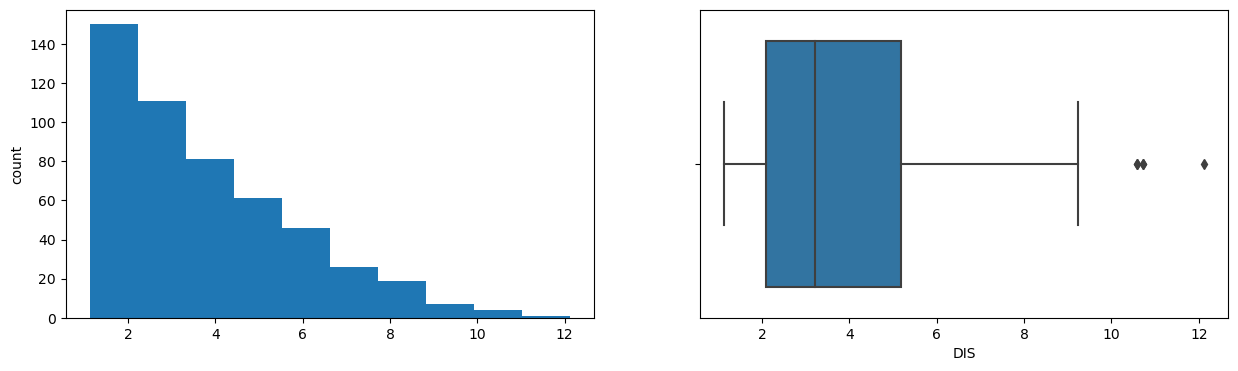

RAD
Skew : 1.0


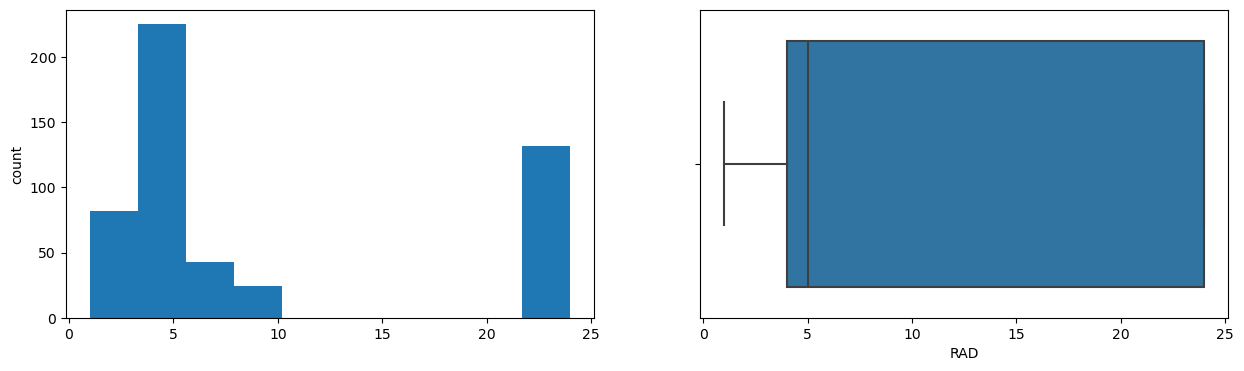

TAX
Skew : 0.67


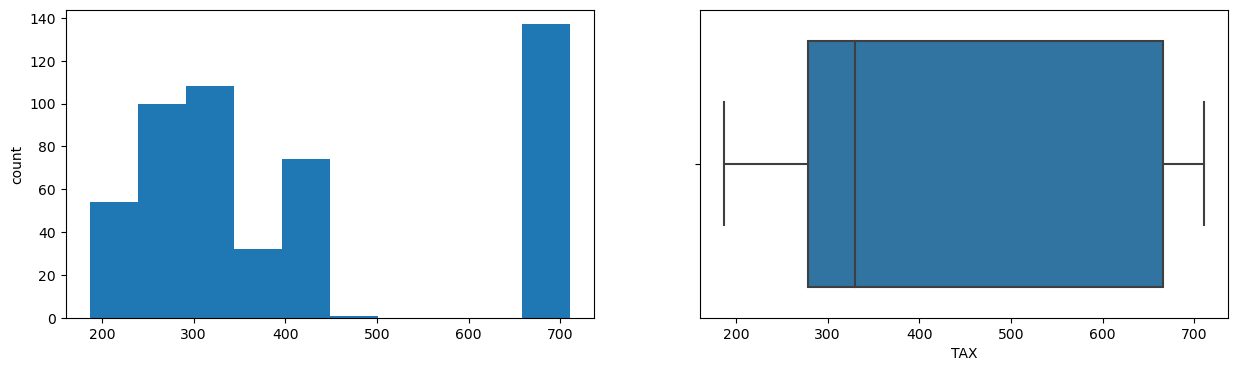

PTRATIO
Skew : -0.8


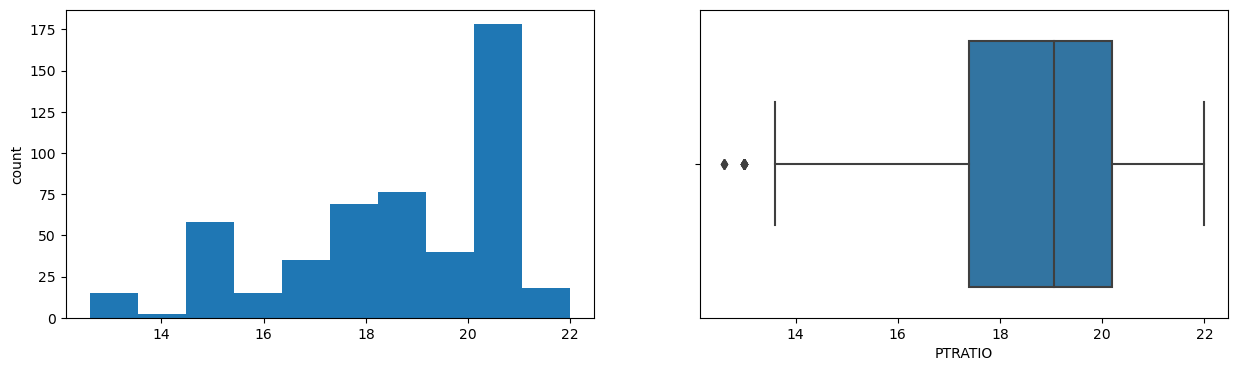

LSTAT
Skew : 0.91


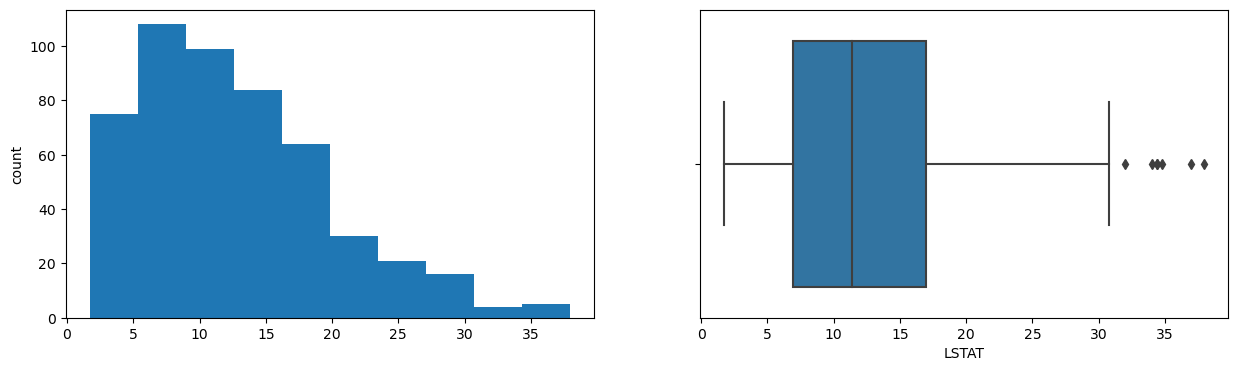

MEDV
Skew : 1.11


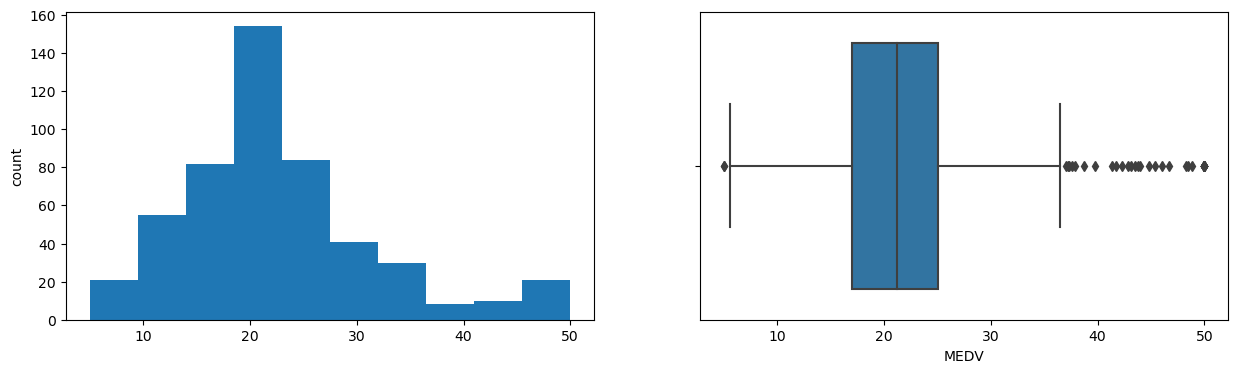

In [ ]:
df_numeric = df.select_dtypes(include=['number'])

# Loop through numeric columns
for col in df_numeric.columns:
    print(col)
    print("Skew :", round(df_numeric[col].skew(), 2))
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    df_numeric[col].hist(bins=10, grid=False)
    plt.ylabel("count")
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_numeric[col])
    plt.show()

### EDA Analysis

#### The positively skewed distribution of the CRIM and ZN variables suggests that the majority of the areas in the dataset have relatively lower crime rates and residential plots of smaller sizes, with only a few areas exhibiting higher crime rates and larger sizes. This distribution could indicate potential patterns in urban development or demographic characteristics of the areas represented in the dataset.
#### On average, the proportion of non-retail business acres per town stands at 11.37, with a minimum of 0.46 and a maximum of 27.74. These figures suggest that most of the town are predominantly residential or suited for retail businesses. It implies a limited presence of industrial activity in this area, with a greater emphasis on residential living and small-scale commercial establishments.
#### The average level of nitric oxide conentration for these towns is 0.554 which indicates fluctuation between clear air and higher lavels of pollution. It's importat to take in consideration this factor to ensure the well being of the residents.
#### The average of 6 rooms per dwelling suggests that many of them are likely spacious and suitable for families or larger households. The minimum of 3 rooms may represent smaller or more modest housing options, while the maximum of 8 rooms may indicate larger or more luxurious dwellings. This variety in the number of rooms per dwelling reflects different housing preferences and socioeconomic factors within the communit.
#### The distribution of the Age variable (proportion of owner-occupied units built before 1940) suggest that most of these houses were build before 1940.
#### The DIS variable, which represents the weighted distances to five Boston employment centers, suggests that the majority of these houses are situated in close proximity to employment hubs. This is advantageous as it implies shorter commute times for families residing in these areas.
#### With an average full-value property tax rate of 408 per 10,000 and a standard deviation of 168.54, it's evident that property tax rates exhibit significant variability within the dataset. While the mean tax rate stands at 408, individual properties can experience substantial deviations from this average, with some facing notably higher tax burdens.
#### The RAD (index of accessibility to radial highways) ranges from 1 to 24, with a mean value of 9.55, suggesting a medium to high level of accessibility to radial highways for the majority of the town's houses.
#### The average pupil-teacher ratio by town (TRATIO) is 18.46, which is favorable as it falls below the desired level of less than 30. In summary, it can be concluded that education standards are generally satisfactory in most of these towns.This particular variable holds significance for families with children when determining their relocation choices.
#### The plot for LSTAT: %lower status of the population shows a notable variability of the status of the residents from these towns. However, the wide range suggests that there are areas with significantly lower socioeconomic status, potentially impacting various socio-economic factors within these towns.
#### The distribution of MEDV appears to be slightly skewed to the right, resembling a nearly normal distribution. The average value of owner-occupied homes, measured in thousands of dollars, is approximately 23. Additionally, the plot indicates some outliers, further confirming the observed right-skewed distribution.

### Heat Map

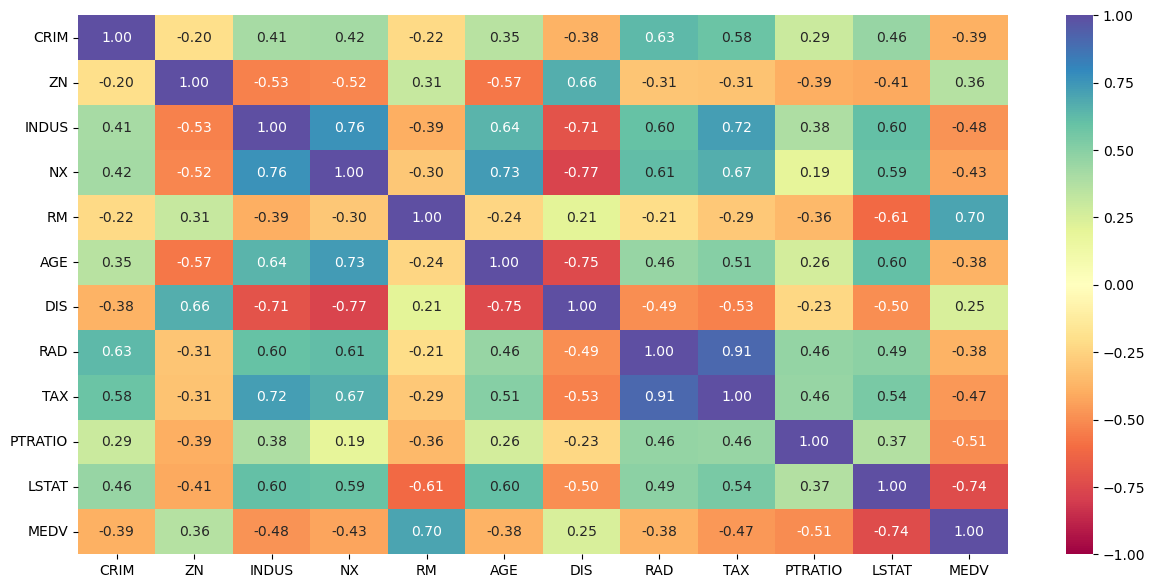

In [ ]:
# generating a heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### As we can see on the above heat map, the following variables are positively correlated.
#### -RM & MEDV
#### -TAX & INDUS
#### -NX &INDUS
#### Below we can see the other variables that has high negative correlation.
#### -DIS &NX
#### -DIS & INDUS
#### -AGE & DIS
#### -LSTAT & MEDV

# Normalizing the data

In [ ]:
scaler=StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

#### We aim to assess clusters ranging from 1 to 9. Our goal is to determine the ideal cluster count by plotting the mean distortion for each scenario.

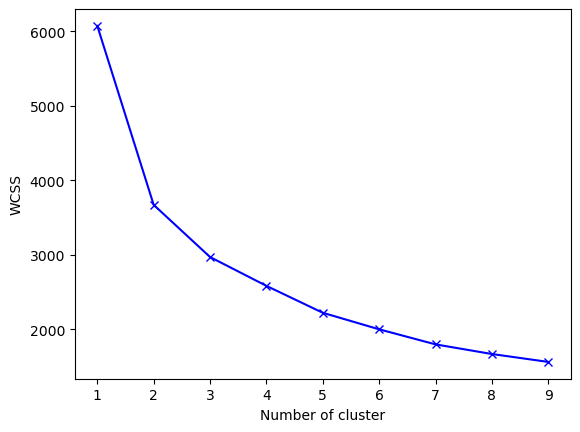

In [ ]:
# step 1
WCSS = {}

# step 2 - iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and
# store the inertia value for that k
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_scaled)
    WCSS[k] = kmeans.inertia_

# step 3
plt.figure()
plt.plot(list(WCSS.keys()), list(WCSS.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

#### Visual inspection suggests elbow at 3 clusters. Let us use Knee Locator

In [ ]:
# Uncomment the following code to install kneed
!pip install kneed

In [ ]:
from kneed import KneeLocator #importing kneelocator from kneed library

In [ ]:
k_values = list(WCSS.keys())
wcss_values = list(WCSS.values())
k1 = KneeLocator(k_values, wcss_values, curve="convex", direction="decreasing")

# Find the elbow point
elbow_point = k1.elbow
print("Elbow point at:", elbow_point)

Elbow point at: 3


# Using the Silhouette method

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
for k in range (2, 11):
    kmeans = KMeans (n_clusters = k, random_state=42)
    kmeans.fit (df_scaled)
    score = silhouette_score (df_scaled, kmeans.labels_)
    silhouette_coefficients.append (score)
# using the silhouette method

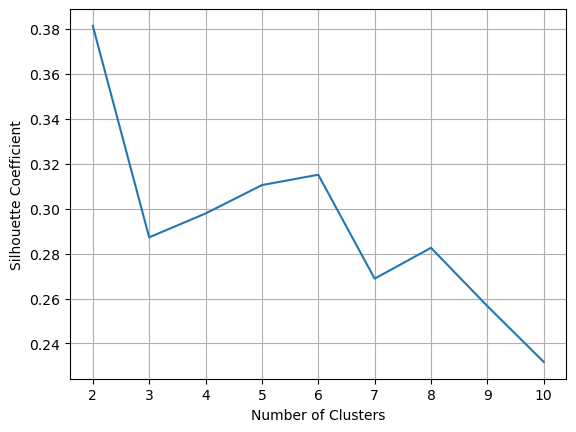

In [ ]:
# Plotting the results:
plt.plot (range (2, 11), silhouette_coefficients)
plt.xticks (range (2, 11))
plt.xlabel ("Number of Clusters")
plt.ylabel ("Silhouette Coefficient")
plt.grid(True)
plt.show ()

#### From the Silhouette score plot showed above we can see that the optimal number is cluster in this case is 3 clusters.

In [ ]:
#### Creatin

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=1)  # initializing the model
kmeans.fit(df_scaled)

KMeans(n_clusters=3, random_state=1)

In [ ]:
#Adding labels to scaled and original data
df_scaled["kmeans_clusters"] = kmeans.labels_
df['kmeans_clusters'] = kmeans.labels_

In [ ]:
df_scaled.head()#displaying the scaled features of the dataset

,CRIM,ZN,INDUS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,kmeans_clusters
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,-1.075562,0.159686,2
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,-0.492439,-0.101524,2
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,-1.208727,1.324247,2
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,-1.361517,1.182758,0
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,-1.026501,1.487503,0


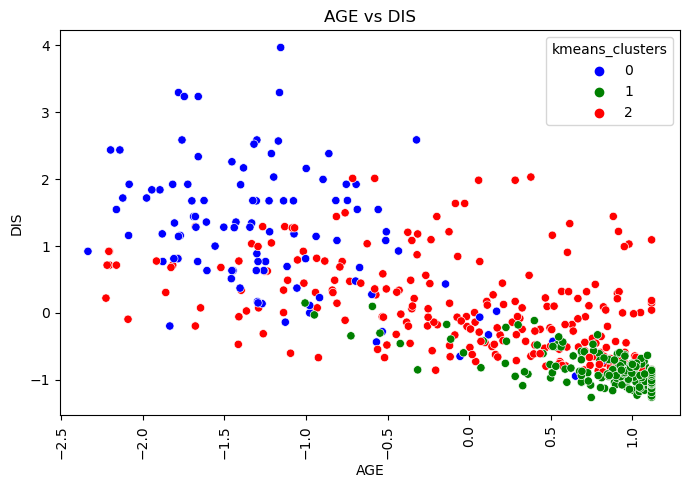

In [ ]:
fig = plt.figure(figsize=(8,5), dpi=100)
sns.scatterplot(x='AGE', y='DIS', data=df_scaled, hue='kmeans_clusters', palette=['blue', 'green', 'red'])
plt.title('AGE vs DIS', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('AGE', fontsize=10)
plt.ylabel('DIS', fontsize=10)
plt.show()

In [ ]:
cluster_profile = df_scaled.groupby("kmeans_clusters").mean()

In [ ]:
cluster_profile["count_in_each_segment"] = (
    df_scaled.groupby("kmeans_clusters")["AGE"].count().values
)

In [ ]:
#Number of observations in each cluster
df_scaled.kmeans_clusters.value_counts ()

2    234
1    169
0    103
Name: kmeans_clusters, dtype: int64

In [ ]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="yellow", axis=0)

,CRIM,ZN,INDUS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,count_in_each_segment
kmeans_clusters,,,,,,,,,,,,,
0,-0.408724,1.566166,-1.072204,-1.020572,0.882689,-1.215935,1.244068,-0.601130,-0.659804,-0.734932,-0.946262,0.946063,103
1,0.771881,-0.487722,1.133659,1.121323,-0.452352,0.805529,-0.854376,1.167392,1.253432,0.602480,0.853138,-0.672245,169
2,-0.377561,-0.337137,-0.346800,-0.360619,-0.061835,-0.046552,0.069446,-0.578516,-0.614830,-0.111629,-0.199638,0.069081,234


<Axes: xlabel='kmeans_clusters'>

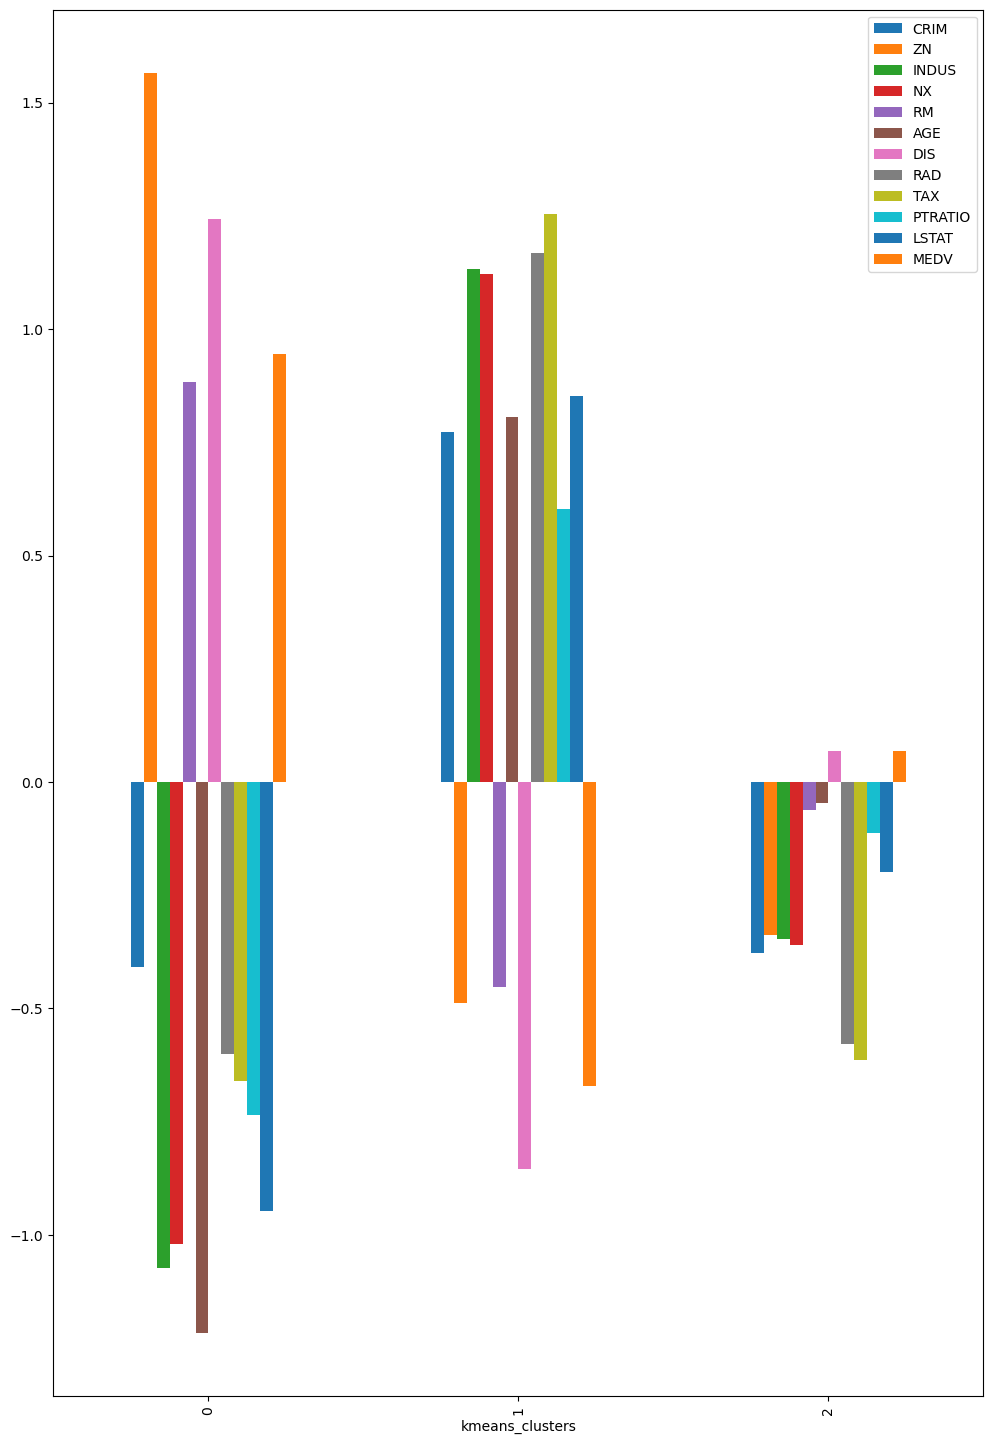

In [ ]:
# plotting means in scaled data
df_scaled.groupby("kmeans_clusters").mean().plot.bar(figsize=(12, 18))

# Hierarchical Clustering Method

In [ ]:
df.head()

,CRIM,ZN,INDUS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,kmeans_clusters
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,2
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,2
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,2
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,0


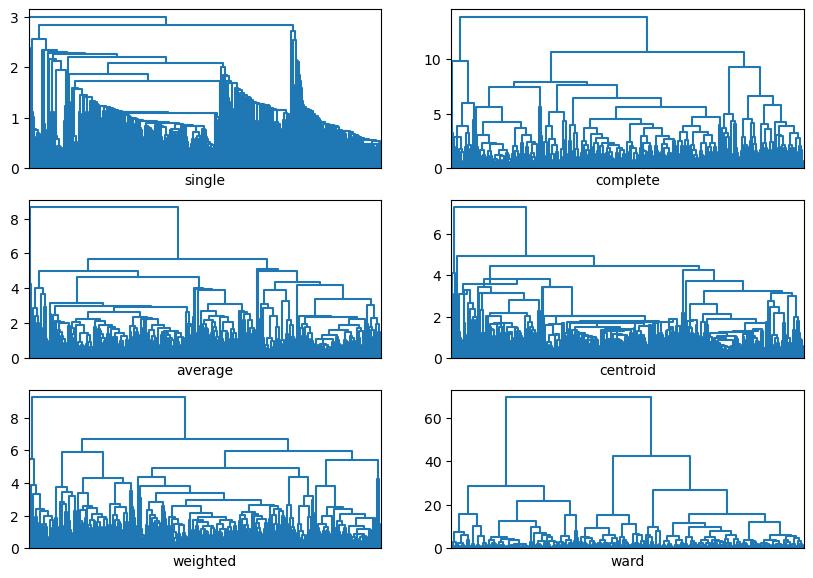

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 7), squeeze=False)
for i, method in enumerate(
    ["single", "complete", "average", "centroid", "weighted", "ward"]
):
    ax = axes[i // 2, i % 2]
    Z = linkage(df_scaled, method=method)
    dendrogram(Z, color_threshold=0, ax=ax, no_labels=True)
    ax.set_xlabel(method)

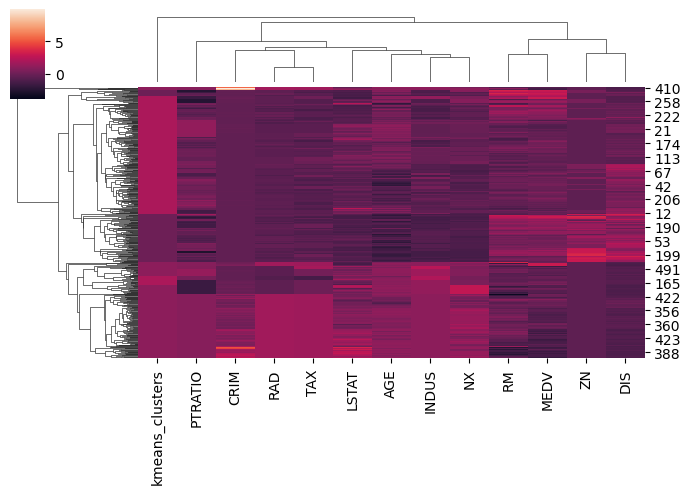

In [ ]:
sns.clustermap(df_scaled, figsize=(7, 5))

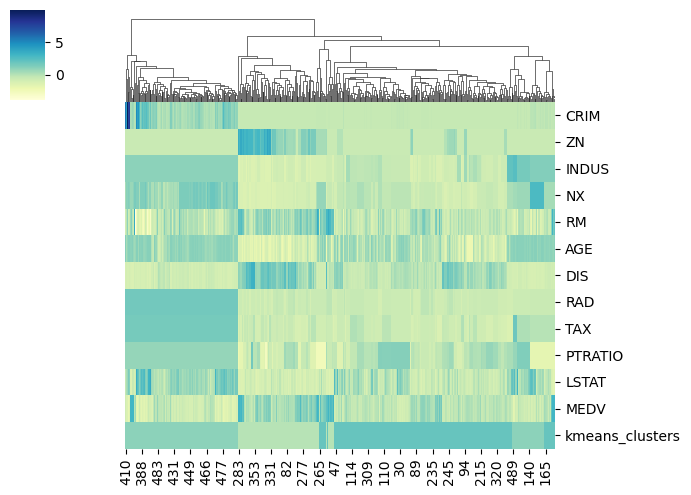

In [ ]:
sns.clustermap(
    df_scaled.T,
    metric="cityblock",
    method="average",
    row_cluster=False,
    col_cluster=True,
    cmap="YlGnBu",
    figsize=(7, 5),
)

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(df_scaled, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(df_scaled))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.71838324118233.
Cophenetic correlation for Euclidean distance and complete linkage is 0.6855159446653749.
Cophenetic correlation for Euclidean distance and average linkage is 0.7638792990431467.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.6894952240791693.
Cophenetic correlation for Chebyshev distance and single linkage is 0.6932220069121919.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.6303223614104988.
Cophenetic correlation for Chebyshev distance and average linkage is 0.7047192281126557.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.7022822117395101.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.5722955508254551.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.4032592282648876.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.5922622355257208.
Cophenetic corr

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print("Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(high_cophenet_corr, high_dm_lm[0], high_dm_lm[1]))

Highest cophenetic correlation is 0.7638792990431467, which is obtained with euclidean distance and average linkage.


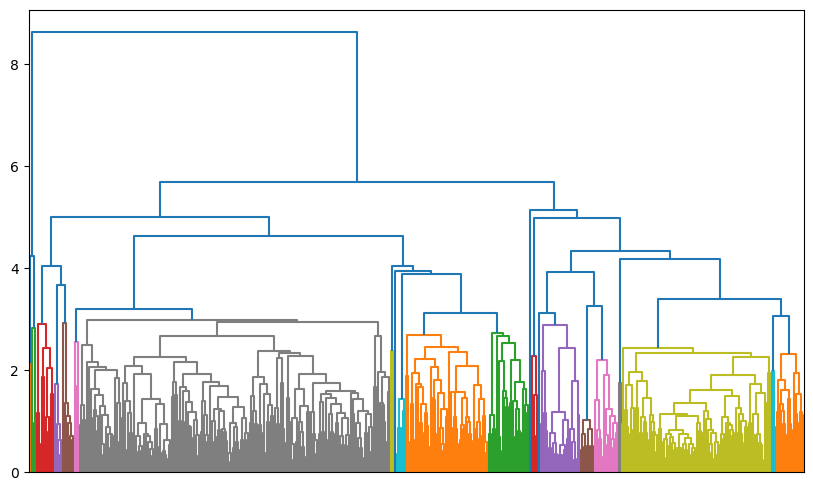

In [ ]:
# Hierarchical clustering using complete linkage and Euclidean distance
Z = linkage(df_scaled, method="average", metric="euclidean")
fig = plt.figure(figsize=(10, 6))
dendrogram(Z, no_labels=True, color_threshold=3)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

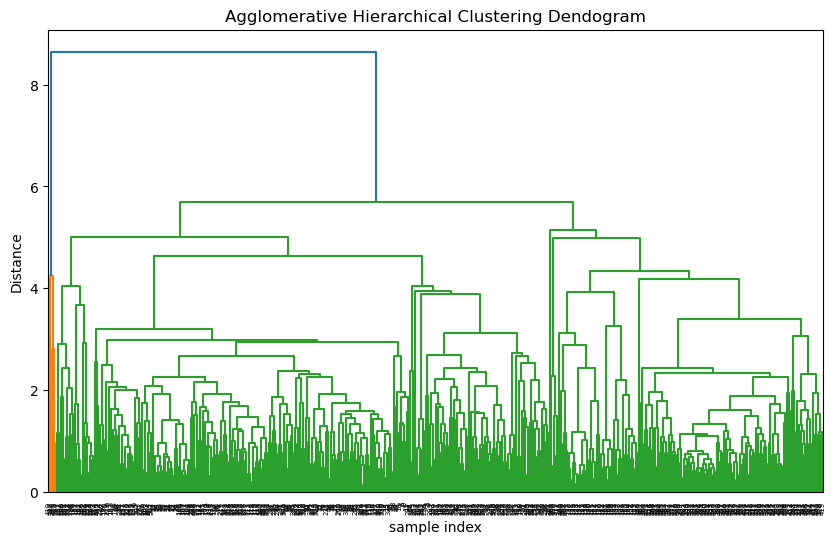

In [ ]:
# Let us visualze the dendrogram
plt.figure(figsize=(10, 6))
plt.title("Agglomerative Hierarchical Clustering Dendogram")
plt.xlabel("sample index")
plt.ylabel("Distance")
dendrogram(Z,leaf_rotation=90.0, leaf_font_size=5.0)
plt.tight_layout
plt.show

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
HCmodel.fit(df_scaled)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=4)

In [ ]:
# adding hierarchical cluster labels to the original dataframes
df["HC_Clusters"] = HCmodel.labels_

In [ ]:
df.sample(5)

,CRIM,ZN,INDUS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,kmeans_clusters,HC_Clusters
375,19.60910,0.0,18.10,0.671,7.313,97.9,1.3163,24,666,20.2,13.44,15.0,1,2
104,0.13960,0.0,8.56,0.520,6.167,90.0,2.4210,5,384,20.9,12.33,20.1,2,0
434,13.91340,0.0,18.10,0.713,6.208,95.0,2.2222,24,666,20.2,15.17,11.7,1,2
288,0.04590,52.5,5.32,0.405,6.315,45.6,7.3172,6,293,16.6,7.60,22.3,0,0
28,0.77299,0.0,8.14,0.538,6.495,94.4,4.4547,4,307,21.0,12.80,18.4,2,0


In [ ]:
cluster_profile_HC = df.groupby("HC_Clusters").mean()

In [ ]:
cluster_profile_HC["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["AGE"].count().values
)

In [ ]:
# let's display cluster profiles
cluster_profile_HC.style.highlight_max(color="pink", axis=0)

,CRIM,ZN,INDUS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,kmeans_clusters,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,,
0,0.243192,17.857143,6.552516,0.484670,6.463981,55.632919,4.814663,4.487578,301.723602,17.864596,9.430839,25.812733,1.360248,322
1,63.845760,0.000000,18.100000,0.663800,6.113400,94.120000,1.584080,24.000000,666.000000,20.200000,17.088000,10.020000,1.000000,5
2,8.019281,0.000000,19.194944,0.677388,5.950989,91.188764,2.023287,18.219101,592.230337,19.465730,18.398820,16.954494,1.084270,178
3,3.474280,0.000000,18.100000,0.718000,8.780000,82.900000,1.904700,24.000000,666.000000,20.200000,5.290000,21.900000,1.000000,1


<Axes: xlabel='HC_Clusters'>

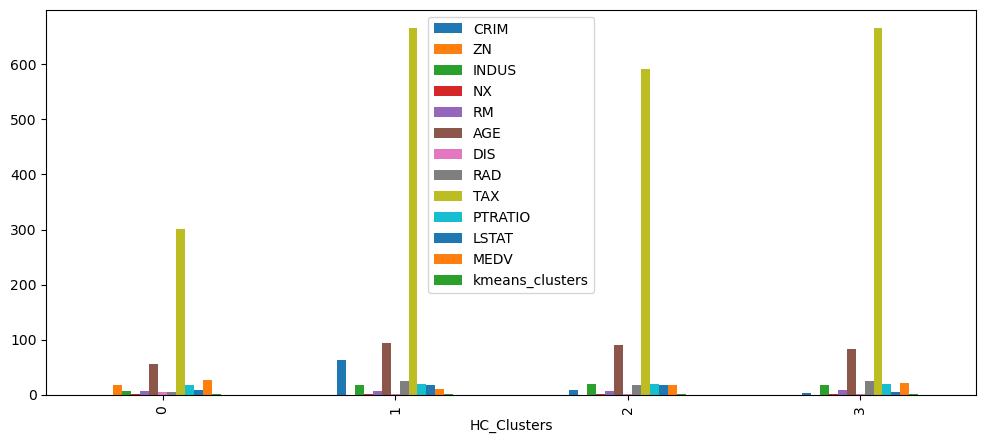

In [ ]:
# plotting of mean of every variable in each cluster
df.groupby("HC_Clusters").mean().plot.bar(figsize=(12, 5))

### K-Means with PCA

In [ ]:
pca=PCA()
pca.fit(df_scaled)
print(pca.components_)

[[ 2.40398696e-01 -2.58150906e-01  3.38279691e-01  3.30313765e-01
  -2.11745387e-01  3.06230095e-01 -3.06859786e-01  3.02341015e-01
   3.24204585e-01  2.13673445e-01  3.16847850e-01 -2.71300006e-01
   5.54890880e-02]
 [ 3.25546621e-01  3.73978389e-01  3.94931582e-02  8.01984102e-02
   3.56896725e-01 -9.49294269e-02  4.67620479e-02  4.08379070e-01
   3.64393725e-01 -6.58362401e-02 -1.31706845e-01  2.26642913e-01
  -4.84757821e-01]
 [-1.46887974e-01 -2.70197227e-01  1.16304216e-01  2.53663849e-01
   4.24885772e-01  3.12774108e-01 -4.19478518e-01 -6.78645728e-02
  -7.86382967e-02 -3.27842868e-01 -2.06009704e-01  4.37811413e-01
   1.44354475e-01]
 [ 1.40532946e-02  3.57329865e-01  6.25194874e-02  2.62158521e-01
  -2.64054940e-01  1.16727058e-01 -1.01739769e-03 -2.00658191e-01
  -9.29194602e-02 -7.11756205e-01  3.30802574e-01 -1.37127862e-01
  -1.80005051e-01]
 [ 8.22376093e-01 -1.39188236e-01 -3.47145324e-01 -1.68144163e-01
   9.07204951e-02  5.46245904e-02 -4.91067985e-02 -3.06866115e-02


In [ ]:
print(pca.explained_variance_ratio_)

[0.50328258 0.12578412 0.12028787 0.06800867 0.04633135 0.03257222
 0.02344652 0.0209762  0.01749226 0.0158891  0.0126145  0.00857299
 0.00474163]


In [ ]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.50328258 0.62906669 0.74935456 0.81736323 0.86369459 0.89626681
 0.91971332 0.94068952 0.95818178 0.97407088 0.98668537 0.99525837
 1.        ]


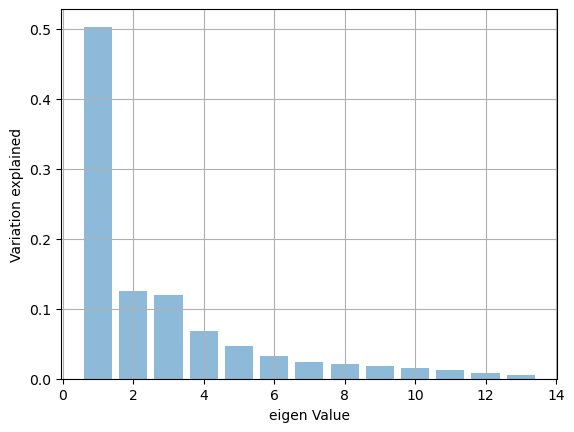

In [ ]:
plt.bar(list(range(1,14)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.grid(True)
plt.show()

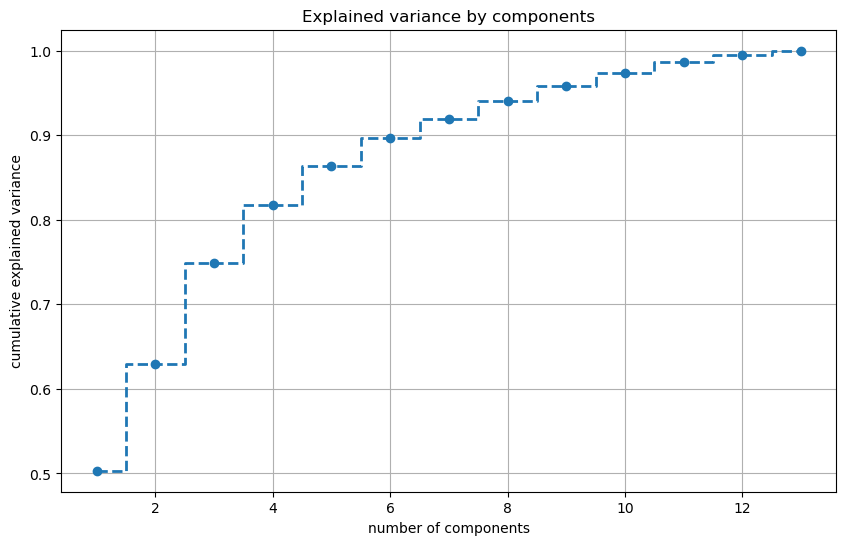

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.step(list(range(1,14)),pca.explained_variance_ratio_.cumsum(),  where="mid",marker="o", linestyle = "--", linewidth=2)
plt.title('Explained variance by components')
plt.xlabel('number of components')
plt.ylabel("cumulative explained variance")
plt.grid(True)
plt.show()

In [ ]:
pca=PCA(n_components=5, random_state=1)
pca5_df = pd.DataFrame(pca.fit_transform(df_scaled), columns=["PC1" , "PC2" , "PC3", "PC4", "PC5"])

In [ ]:
pca5_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.993135,-0.656612,0.873653,0.640678,0.646045
1,-1.253957,-1.352185,0.299849,-0.221077,0.508773
2,-2.292032,-0.486156,1.336114,-1.014833,0.502814
3,-2.870426,0.392986,0.273140,-1.057376,0.116365
4,-2.799402,0.466724,0.520538,-1.009465,0.170139


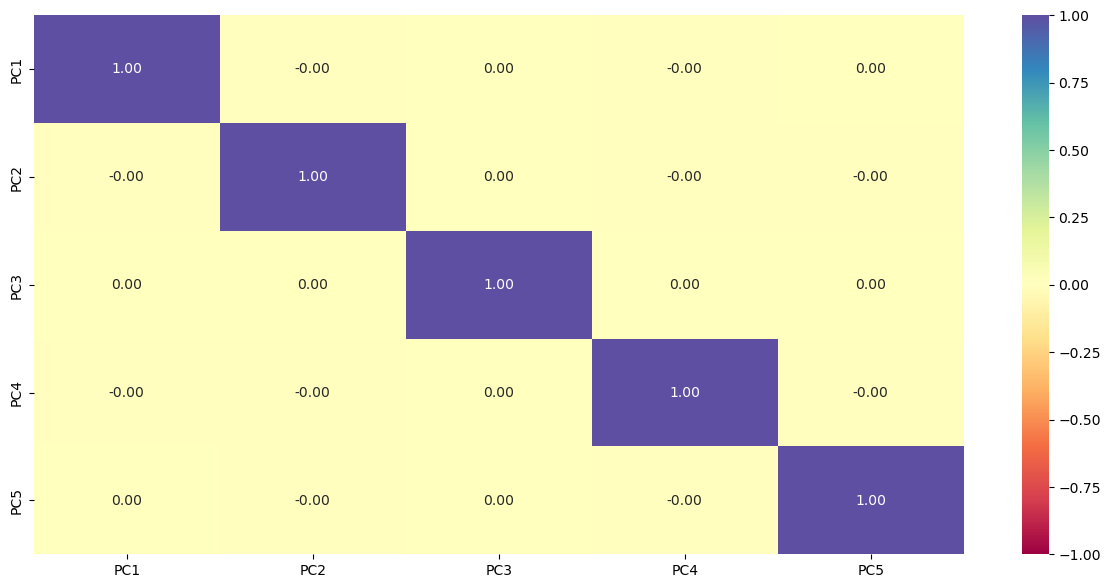

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    pca5_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

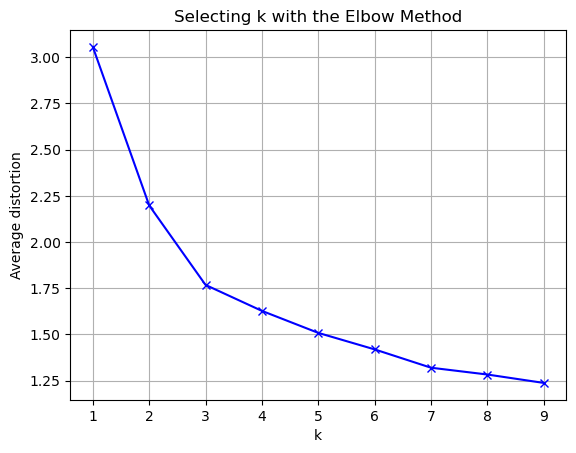

In [ ]:
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=2)
    model.fit(pca5_df)
    prediction = model.predict(pca5_df)
    distortion = (
        sum(
            np.min(cdist(pca5_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / pca5_df.shape[0]
    )

    meanDistortions.append(distortion)

    #print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.grid(True)
plt.show()

In [ ]:
silhouette_coefficients = []
for k in range (2, 11):
    kmeans = KMeans (n_clusters = k, random_state=2)
    kmeans.fit (pca5_df)
    score = silhouette_score (pca5_df, kmeans.labels_)
    silhouette_coefficients.append (score)

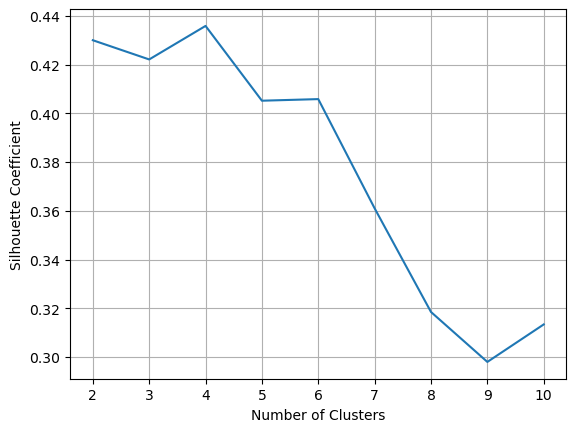

In [ ]:
# Plotting the results:
plt.plot (range (2, 11), silhouette_coefficients)
plt.xticks (range (2, 11))
plt.xlabel ("Number of Clusters")
plt.ylabel ("Silhouette Coefficient")
plt.grid(True)
plt.show ()

In [ ]:
# Create a KMeans object with 6 clusters
kmeans_pca = KMeans(n_clusters=6, random_state=1)

# Fit the KMeans algorithm on the PCA-transformed data
kmeans_pca.fit(pca5_df)

# Assign cluster labels to the PCA scores
pca5_df["PCA_kmeans_clusters"] = kmeans_pca.labels_

In [ ]:
pca5_df.head()

,PC1,PC2,PC3,PC4,PC5,PCA_kmeans_clusters
0,-1.993135,-0.656612,0.873653,0.640678,0.646045,1
1,-1.253957,-1.352185,0.299849,-0.221077,0.508773,1
2,-2.292032,-0.486156,1.336114,-1.014833,0.502814,5
3,-2.870426,0.392986,0.273140,-1.057376,0.116365,2
4,-2.799402,0.466724,0.520538,-1.009465,0.170139,2


In [ ]:
pca5_df.PCA_kmeans_clusters.value_counts ()

1    189
0    103
2     89
3     56
5     38
4     31
Name: PCA_kmeans_clusters, dtype: int64

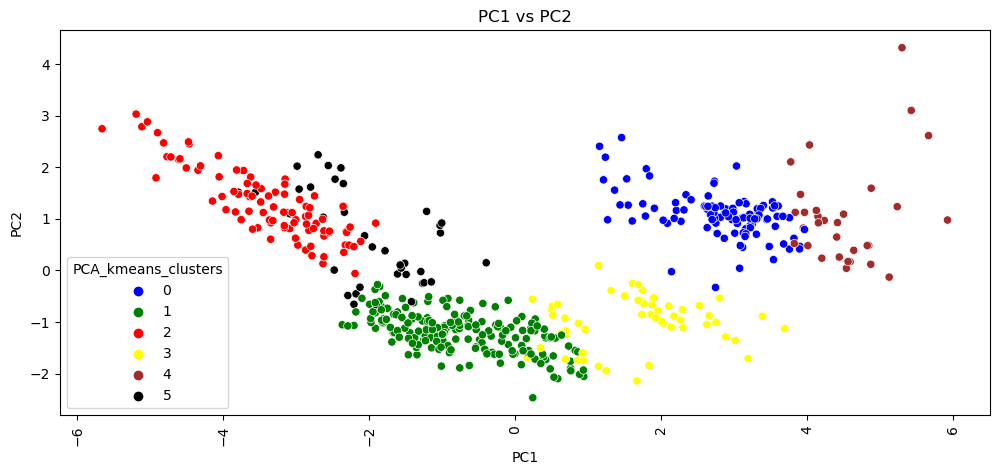

In [ ]:
fig = plt.figure(figsize=(12,5), dpi=100)
sns.scatterplot(x='PC1', y='PC2', data=pca5_df, hue='PCA_kmeans_clusters', palette=['blue', 'green', 'red','yellow','brown','black'])
plt.title('PC1 vs PC2', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('PC1', fontsize=10)
plt.ylabel('PC2', fontsize=10)
plt.show()

In [ ]:
#Appending cluster lables based on PCA to the original data frame
df_scaled["PCA_kmeans_clusters"]=kmeans_pca.labels_

In [ ]:
cluster_profile_new = df_scaled.groupby("PCA_kmeans_clusters").mean().drop(columns=["kmeans_clusters"])

In [ ]:
# let's display cluster profiles
cluster_profile_new.style.highlight_max(color="lightblue", axis=0)

,CRIM,ZN,INDUS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
PCA_kmeans_clusters,,,,,,,,,,,,
0,0.488894,-0.487722,1.043311,0.986649,-0.128763,0.693771,-0.756910,1.616600,1.536116,0.805678,0.496670,-0.453291
1,-0.388774,-0.335914,-0.484505,-0.477547,-0.234314,-0.216535,0.223331,-0.583219,-0.626887,0.116457,-0.166146,-0.108147
2,-0.412772,1.805822,-1.086620,-1.128220,0.635663,-1.371266,1.471390,-0.622462,-0.624433,-0.672984,-0.917607,0.706808
3,-0.281659,-0.478142,1.350809,1.060058,-0.643679,0.921721,-0.844470,-0.594852,-0.053908,-0.411254,0.722141,-0.500336
4,2.881250,-0.487722,1.015999,1.082147,-1.192194,0.961372,-1.049948,1.661245,1.530926,0.806576,1.927322,-1.374221
5,-0.360181,-0.134201,-0.692676,-0.101753,1.946792,0.265538,-0.404283,-0.501825,-0.752728,-1.238770,-1.007246,1.969538


<Axes: xlabel='PCA_kmeans_clusters'>

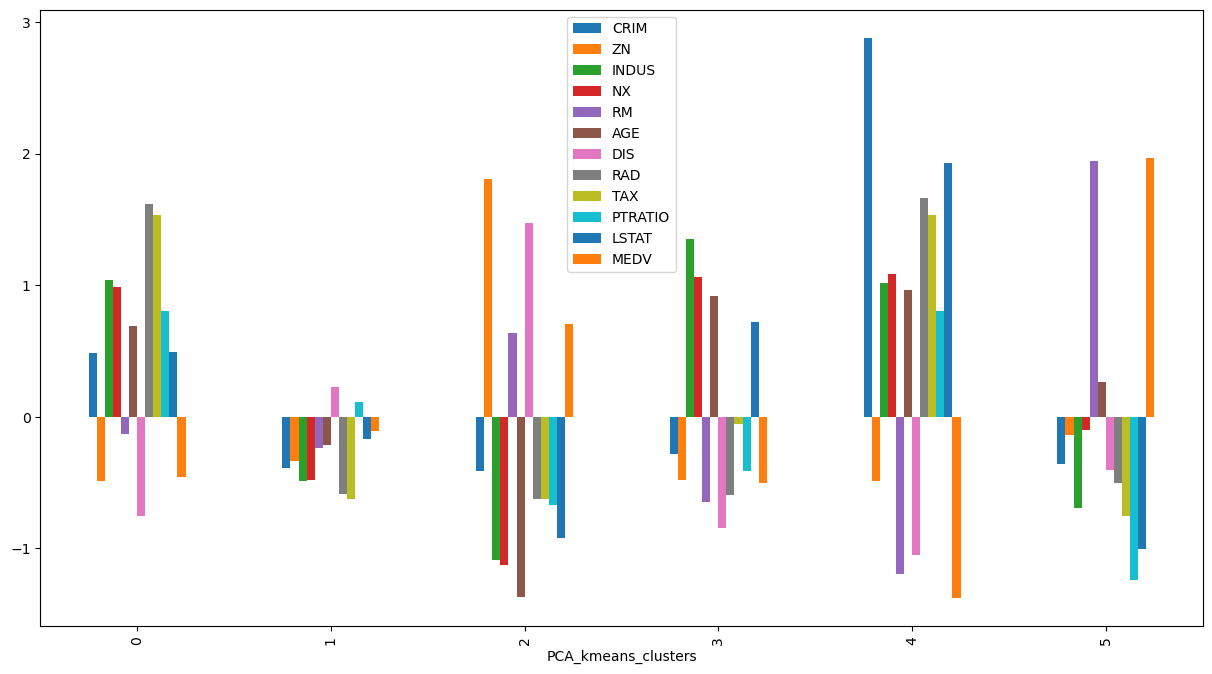

In [ ]:
df_scaled.groupby("PCA_kmeans_clusters").mean().drop(columns=["kmeans_clusters"]).plot.bar(figsize=(15, 8))